## Lab 9

Maria Paula Vizcaino Forero

We import the libraries beforehand

In [1]:
import math
import pandas as pd
import numpy as np
import random
from collections import Counter
from copy import copy
import copy as copyprob
import matplotlib.pyplot as plt

**1.** Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

**Gale-Shapley**

In [2]:
def wPrefersM1OverM(prefer, woman, man, man1, n): 

  N = n
	# Check if w prefers m over her 
  for i in range(N):

		# If m1 comes before m in list of w, then w prefers her current engagement
    if (prefer[woman][i] == man1): 
      return True

		# If m comes before m1 in w's list, then free her current engagement
    if (prefer[woman][i] == man): 
      return False
  
def stableMarriage(prefer, n): 
  N = n
  
  # Indicates the partner of w
  wPartner = [-1 for i in range(N)] 

	# An array to store availability of men
  mFree = [False for i in range(N)] 

  freeCount = N 

  count = 0

	# While there are single men 
  while (freeCount > 0): 
    count += 1

		# First free man makes a proposal
    m = 0
    while (m < N): 
      if (mFree[m] == False): 
        break
      m += 1

    i = 0
    while i < N and mFree[m] == False: 
      w = prefer[m][i] 

			# The woman of preference is free, w and m get engagement
      if (wPartner[w - N] == -1): 
        wPartner[w - N] = m 
        mFree[m] = True
        freeCount -= 1

      else: 	
				# If w is not free, find current engagement of w 
        m1 = wPartner[w - N] 

				# If w prefers m over her current engagement m1, engage m with w. 
        if (wPrefersM1OverM(prefer, w, m, m1, N) == False): 
          wPartner[w - N] = m 
          mFree[m] = True
          mFree[m1] = False
      i += 1

	# Results
  print("Iterations: ", count)
  print("Woman ", " Man") 
  for i in range(N): 
    print(i + N, "-----", wPartner[i])

In [3]:
def worstCaseGS(N):
  
  preferS = []
  
  # Woman list
  preferW = [i+N for i in range(N)]
  preferS.append(preferW[:])
  for i in range(N-1):
    listaux = preferW[1:N-1]
    elemaux = preferW[0]
    preferW[N-2] = elemaux
    preferW[0:N-2] = listaux[:]
    preferS.append(preferW[:])

  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferS.append(preferM[:])
  return preferS

In [4]:
def bestCasesGS(N):

  preferBS = []

  # Woman list
  preferW = [i+N for i in range(N)]
  for i in range(N):
    ax = preferW.pop(0)
    preferW.append(ax)
    preferBS.append(preferW[:])

  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferBS.append(preferM[:]) 
  return preferBS

* For $n=4$ we have:

*Worst case* 

In [5]:
print("Worst case is: O(n) = n(n-1)+1 =", 4*(4-1)+1)
stableMarriage(worstCaseGS(4), 4)

Worst case is: O(n) = n(n-1)+1 = 13
Iterations:  13
Woman   Man
4 ----- 1
5 ----- 2
6 ----- 3
7 ----- 0


*Best case*

In [6]:
print("Best case is: O(n) = n =", 4)
stableMarriage(bestCasesGS(4), 4)

Best case is: O(n) = n = 4
Iterations:  4
Woman   Man
4 ----- 3
5 ----- 0
6 ----- 1
7 ----- 2


* For $n=40$ we have:

*Worst case*

In [7]:
print("Worst case is: O(n) = n(n-1)+1 =", 40*(40-1)+1)
stableMarriage(worstCaseGS(40), 40)

Worst case is: O(n) = n(n-1)+1 = 1561
Iterations:  1561
Woman   Man
40 ----- 1
41 ----- 2
42 ----- 3
43 ----- 4
44 ----- 5
45 ----- 6
46 ----- 7
47 ----- 8
48 ----- 9
49 ----- 10
50 ----- 11
51 ----- 12
52 ----- 13
53 ----- 14
54 ----- 15
55 ----- 16
56 ----- 17
57 ----- 18
58 ----- 19
59 ----- 20
60 ----- 21
61 ----- 22
62 ----- 23
63 ----- 24
64 ----- 25
65 ----- 26
66 ----- 27
67 ----- 28
68 ----- 29
69 ----- 30
70 ----- 31
71 ----- 32
72 ----- 33
73 ----- 34
74 ----- 35
75 ----- 36
76 ----- 37
77 ----- 38
78 ----- 39
79 ----- 0


*Best case*

In [8]:
print("Best case is: O(n) = n =", 40)
stableMarriage(bestCasesGS(40), 40)

Best case is: O(n) = n = 40
Iterations:  40
Woman   Man
40 ----- 39
41 ----- 0
42 ----- 1
43 ----- 2
44 ----- 3
45 ----- 4
46 ----- 5
47 ----- 6
48 ----- 7
49 ----- 8
50 ----- 9
51 ----- 10
52 ----- 11
53 ----- 12
54 ----- 13
55 ----- 14
56 ----- 15
57 ----- 16
58 ----- 17
59 ----- 18
60 ----- 19
61 ----- 20
62 ----- 21
63 ----- 22
64 ----- 23
65 ----- 24
66 ----- 25
67 ----- 26
68 ----- 27
69 ----- 28
70 ----- 29
71 ----- 30
72 ----- 31
73 ----- 32
74 ----- 33
75 ----- 34
76 ----- 35
77 ----- 36
78 ----- 37
79 ----- 38


**Irving**

In [9]:
# Function keys
def getKey(list0, key0):
    for key, val in list0.items():
        if val == key0:
            return key
    return 0

# Function cycle
def cycle(table):
    tableI = table[0]
    tableD = table[1]
    if len(tableI) > len(set(tableI)):
        return True
    else:
        return False

# Function case non estable
def nonEstable(prefer):
    for i in prefer:
        if len(prefer[i]) == 0:
            return True
    return False

# Function case estable
def Estable(prefer):
  for i in prefer:
    if len(prefer[i]) != 1:
      return False
  return True

# Function remove cycle
def removeCycle(prefer, table):
  npreferences = prefer
  for i in range(len(table[0]) - 1):
    npreferences[table[1][i]].remove(table[0][i+1])
    npreferences[table[0][i+1]].remove(table[1][i])
  return npreferences

# Function first step
def step1(prefer):

  # Waiting list
  waiting_list = []

  # Proposals at the time
  proposals = {}

  # Proposal's amount
  nproposals = {}

  # Step's amount
  steps = 0

  for i in prefer:
    waiting_list.append(i)
    proposals[i] = None
    nproposals[i] = 0
  npreferences = copyprob.deepcopy(prefer)

  # While there are w in waiting list
  while not len(waiting_list) == 0:
    i = waiting_list[0]
    nproposals[i] += 1
    steps += 1

    # Case non estable proposals
    if nproposals[i]> len(proposals):
      print("There are not estable couples.")
      return (False,False)

    for j in prefer[i]:

      # Case any proposals
      if proposals[j] == None:
        del waiting_list[0]
        proposals[j] = i
        break

      # Num proposals not the iteration
      elif proposals[j] != i:
        actual = prefer[j].index(i)
        other = prefer[j].index(proposals[j])
        if actual < other:
          del waiting_list[0]
          waiting_list.insert(0, proposals[j])
          npreferences[proposals[j]].remove(j)
          npreferences[j].remove(proposals[j])
          proposals[j] = i
          break
        else:
          npreferences[i].remove(j)
          npreferences[j].remove(i)
    prefer = copyprob.deepcopy(npreferences)
  return (proposals, prefer, steps)

# Function second step
def step2(proposals, prefer, steps):
  npreferences = copyprob.deepcopy(prefer)

  for k in prefer:
    indexproposals = npreferences[k].index(proposals[k])
    npreferences[k]= npreferences[k][:indexproposals+1]
    
    for j in prefer:
      key = getKey(proposals,k)
      if j != k and j != proposals[k] and j != key:
        try:
          npreferences[j].remove(k)
        except ValueError:
          pass
  return (npreferences, steps)

# Function third step
def step3(prefer, steps):

  t = True
  while True:

    table=([],[])
    if nonEstable(prefer):
      print("There are not estable couples.")
      return False

    for i in prefer:

      if len(prefer[i]) >= 2 and t == True:
        match1 = i
        table[0].append(match1)
        match2 = prefer[i][1]
        table[1].append(match2)
        t = False
        steps += 1

      elif t == False:
        if (cycle(table)):
          prefer = removeCycle(prefer, table)
          t = True
          steps += 1
          break
        match1 = prefer[match2][-1]
        table[0].append(match1)
        match2 = prefer[match1][1]
        table[1].append(match2)
        steps += 1

    if Estable(prefer):
      return (prefer, steps)

  return False

# General function
def Irving(prefer):

  a = step1(prefer)
  proposals = a[0]

  if proposals == False:
    return False
  prefer1 = a[1]
  steps = a[2]
  prefer2 = step2(proposals, prefer1, steps)[0]
  steps = step2(proposals, prefer1, steps)[1]

  if prefer2 == False:
    return False

  prefer3 = step3(prefer2, steps)
  matches = prefer3[0]
  steps = prefer3[1]

  # Results
  print("Woman ", " Man") 
  for i in matches:
    a=i
    for j in matches[i]:
      print(a," ----- ", j)

In [10]:
def worstIrving(n):

  prefer = {}

  for k in range(n):
      ni = n
      wlist = []
      for i in range(k+1, n):
        wlist.append(i)
      for j in range (k):
        wlist.append(j)
      prefer[k] = wlist
      
  return prefer

In [11]:
def bestIrving(n):

  prefer = {}

  for k in range(n):
      blist=[]
      blist.append(n-k-1)

      while not len(blist) == n-1:
        r=random.randint(0, n-1)
        if r not in blist and r != k:
          blist.append(r)
      prefer[k] = blist

  return prefer

* For $n=4$ we have:

*Worst case*

In [12]:
Irving(worstIrving(4))

Woman   Man
0  -----  3
1  -----  2
2  -----  1
3  -----  0


*Best case*

In [13]:
Irving(bestIrving(4))

Woman   Man
0  -----  3
1  -----  2
2  -----  1
3  -----  0


* For $n=40$ we have:

*Worst case*

In [14]:
Irving(worstIrving(40))

Woman   Man
0  -----  39
1  -----  2
2  -----  1
3  -----  4
4  -----  3
5  -----  6
6  -----  5
7  -----  8
8  -----  7
9  -----  10
10  -----  9
11  -----  12
12  -----  11
13  -----  14
14  -----  13
15  -----  16
16  -----  15
17  -----  18
18  -----  17
19  -----  20
20  -----  19
21  -----  22
22  -----  21
23  -----  24
24  -----  23
25  -----  26
26  -----  25
27  -----  28
28  -----  27
29  -----  30
30  -----  29
31  -----  32
32  -----  31
33  -----  34
34  -----  33
35  -----  36
36  -----  35
37  -----  38
38  -----  37
39  -----  0


*Best case*

In [15]:
Irving(bestIrving(40))

Woman   Man
0  -----  39
1  -----  38
2  -----  37
3  -----  36
4  -----  35
5  -----  34
6  -----  33
7  -----  32
8  -----  31
9  -----  30
10  -----  29
11  -----  28
12  -----  27
13  -----  26
14  -----  25
15  -----  24
16  -----  23
17  -----  22
18  -----  21
19  -----  20
20  -----  19
21  -----  18
22  -----  17
23  -----  16
24  -----  15
25  -----  14
26  -----  13
27  -----  12
28  -----  11
29  -----  10
30  -----  9
31  -----  8
32  -----  7
33  -----  6
34  -----  5
35  -----  4
36  -----  3
37  -----  2
38  -----  1
39  -----  0


**2.** Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [16]:
def GS(n):

  step_count=[]
  
  # Gale-Sahpley Algoritm 100 times
  
  for t in range(100): 

    # Choosing man and woman
    man=[random.sample(list(range(1,n+1)),n) for i in range(n)]
    woman=[random.sample(list(range(1,n+1)),n) for i in range(n)]

    # Man's and woman's list
    man_list = list(range(1,n+1))
    woman_list = list(range(n+1,n*2+1))

    # For dataframes
    col=list(range(n+1,n*2+1))
    ind=list(range(1,n+1))

    # Woman's and man's dataframe
    woman_df = pd.DataFrame({col[i]:woman[i] for i in range(n)},index=ind) 
    man_df = pd.DataFrame(man,columns=col,index=ind) 

    # Available woman list
    woman_available = {man:woman_list for man in man_list}

    # Waiting list
    waiting_list = []

    # Proposal's amount
    proposals = {}
    count = 0

    # While there are single man
    while len(waiting_list) < len(man_list):

      for man in man_list:
        
        # For each men single a proposal is made
        if man not in waiting_list:
            
          women = woman_available[man]
          best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
          
          # Proposal's amount          
          proposals[(man, best_choice)]=(man_df.loc[man][best_choice],woman_df.loc[man][best_choice])

      overlays = Counter([key[1] for key in proposals.keys()])

      for women in overlays.keys():

        # For each women we see her proposal and take the optimal 
        if overlays[women] > 1:

          # Remove other m
          pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:]

          # Remove w form available list
          for p_to_drop in pairs_to_drop:
            del proposals[p_to_drop[0]]
            _women = copy(woman_available[p_to_drop[0][0]])
            _women.remove(p_to_drop[0][1])
            woman_available[p_to_drop[0][0]] = _women

      waiting_list = [man[0] for man in proposals.keys()]

      count += 1

    step_count.append(count)

  # Plot the histogram
  plt.hist(step_count, bins=max(step_count)-min(step_count))
  plt.xlabel('Days')
  plt.ylabel('Frecuency')
  plt.title("Histogram n of days")
  plt.show()
  print("Maximum of days: ",max(step_count))
  print("Minimum of days: ",min(step_count))
  print("Average of days: ",sum(step_count)/len(step_count))

* For $n=4$ we have:

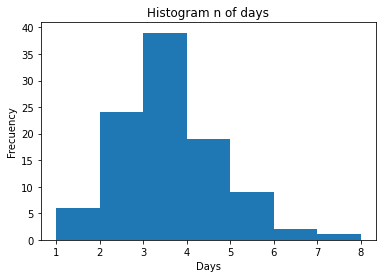

Maximum of days:  8
Minimum of days:  1
Average of days:  3.12


In [17]:
GS(4)

* For $n=40$ we have:

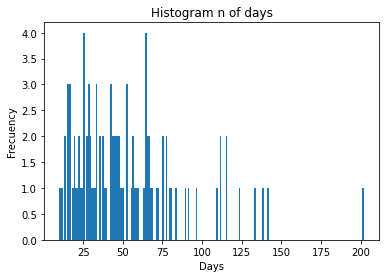

Maximum of days:  202
Minimum of days:  10
Average of days:  52.36


In [18]:
GS(40)

# References

* Geeks and Geeks https://www.geeksforgeeks.org/stable-marriage-problem/